# Adult dataset preparation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

Set the numpy random seed

In [2]:
np.random.seed(123)

Downloading the adult train and test datasets.

Here I download, concatenate and save the train and test datasets.

In [3]:
ADULT_WEBSITE_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/"
ADULT_TRAINSET_URL = ADULT_WEBSITE_URL + "adult.data"
ADULT_TESTSET_URL  = ADULT_WEBSITE_URL + "adult.test"
ADULT_COLUMNS = columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Target']


In [4]:
if not Path("adult_full.csv").exists():
    adult_tr = pd.read_csv(ADULT_TRAINSET_URL, names=ADULT_COLUMNS, na_values=['?', ' ?', '? '])
    adult_te = pd.read_csv(ADULT_TESTSET_URL, names=ADULT_COLUMNS, na_values=['?', ' ?', '? '], skiprows=1)

    c = pd.concat((adult_te, adult_tr))
    c.to_csv("adult_full.csv", index=False)
df = pd.read_csv("adult_full.csv", na_values=['?', ' ?', '? '])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   Fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Hours-per-week  48842 non-null  int64 
 13  Native-country  47985 non-null  object
 14  Target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Column analysis

## Numerical columns

In [6]:
numerical_columns = df.select_dtypes(['number']).columns
len(numerical_columns)

6

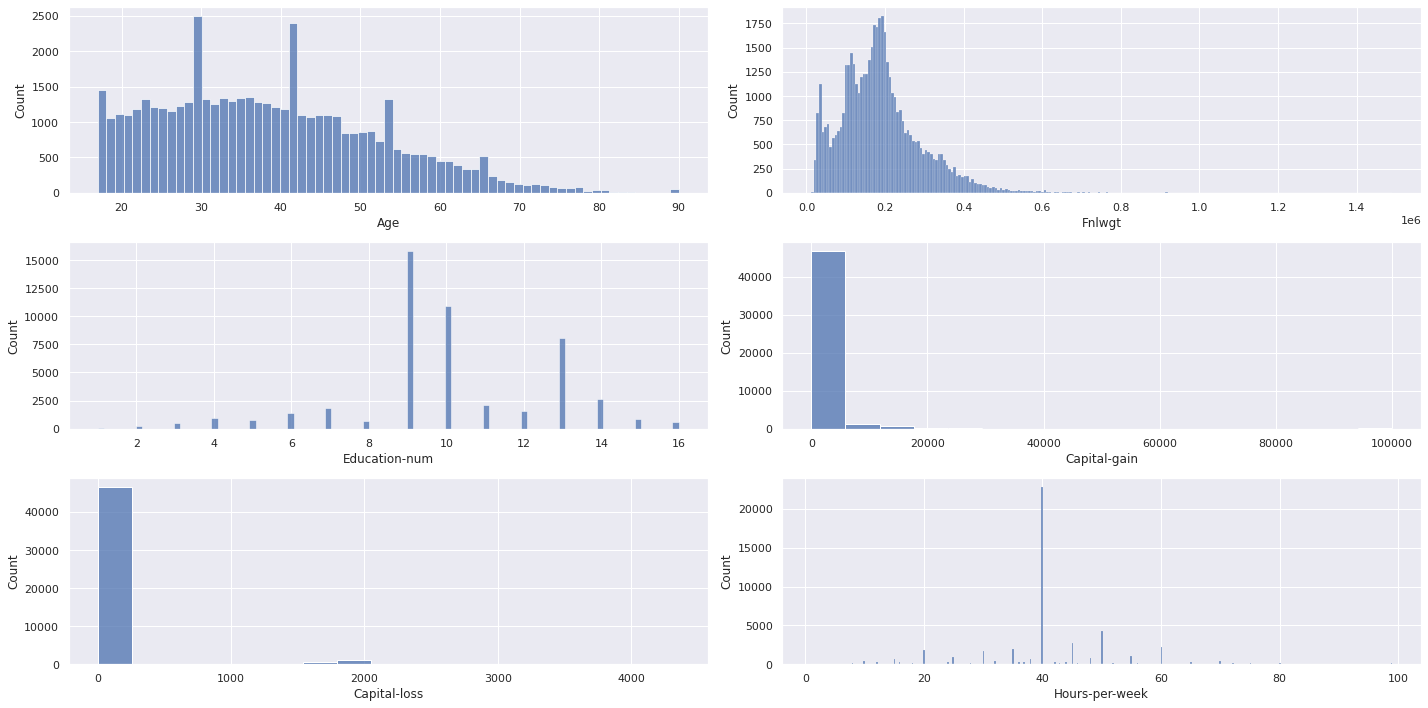

In [7]:
fix, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
for numerical_col, ax in zip(numerical_columns, axes.ravel()):
    sns.histplot(df[numerical_col], ax=ax)
plt.tight_layout()

## Categorical columns

In [8]:
categorical_columns = df.select_dtypes(['object']).columns
len(categorical_columns)

9

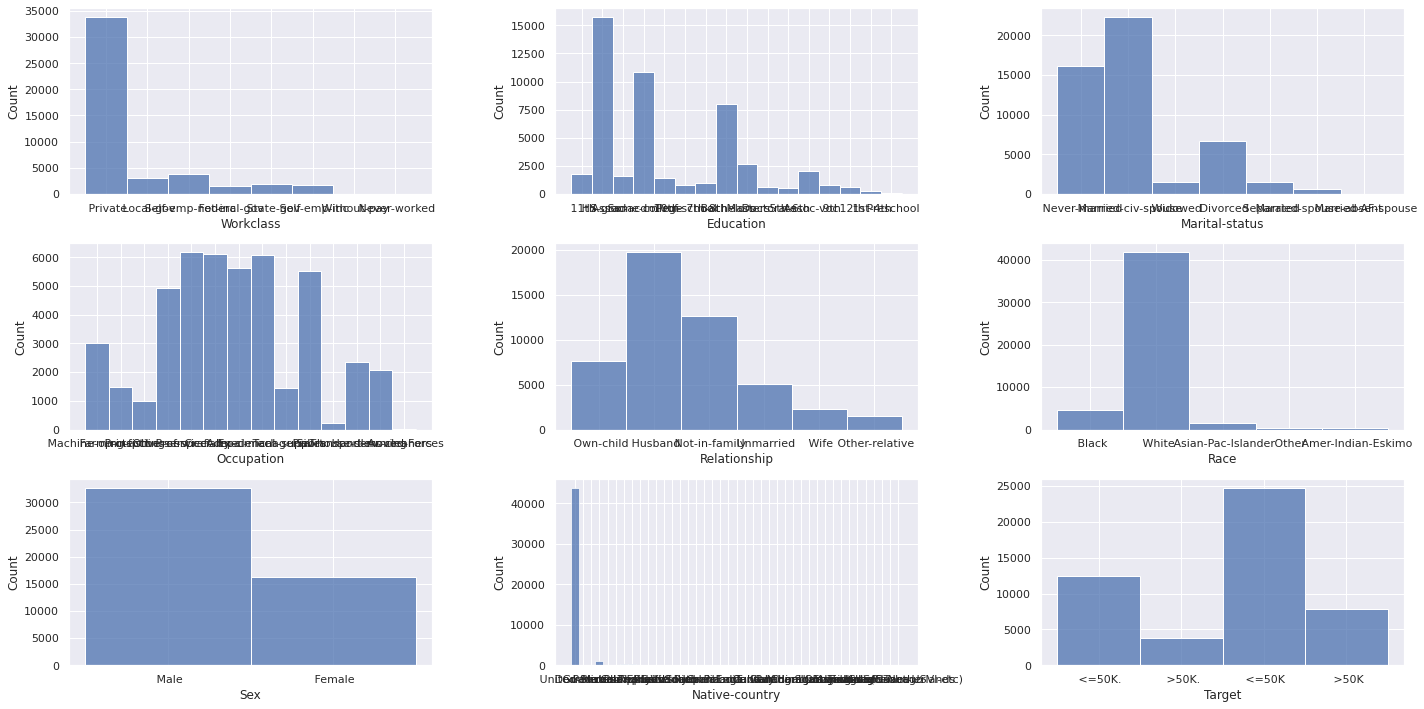

In [9]:
fix, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
for categorical_column, ax in zip(categorical_columns, axes.ravel()):
    sns.histplot(df[categorical_column], ax=ax)
plt.tight_layout()

$90$% of `Native-country` entries are from `USA`

<AxesSubplot:ylabel='Native-country'>

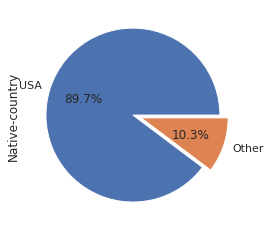

In [10]:
def is_from_us(x: str):
    if type(x) is not float and x.lower().startswith('united'):
        return 'USA'
    else:
        return 'Other'

df['Native-country'].str.strip().apply(is_from_us).value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', explode=(0, 0.1))


The dots need to be deleted and the target should be mapped into $0$ and $1$

In [11]:
df['Target'].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: Target, dtype: int64

# Preprocessing

The preprocessing steps applied are:
 * Elimination of rows with missing values
 * Elimination of duplicate rows
 * Stripping of all the strings
 * Elimination of the `Education` column due to the presence of the `Education-num` column.
 * Binarization of the `Native-country` column in `USA` and `Non-USA`
 * Target mapping from strings to 0 and 1
 * Elimination of the `Relationship` column due to the similarity and correlation with the  `Marital-status` column.
 * Standard Scaling of the numerical features

## Elimination of rows with missin values and duplicate rows

Before

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   Fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Hours-per-week  48842 non-null  int64 
 13  Native-country  47985 non-null  object
 14  Target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

After

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             45194 non-null  int64 
 1   Workclass       45194 non-null  object
 2   Fnlwgt          45194 non-null  int64 
 3   Education       45194 non-null  object
 4   Education-num   45194 non-null  int64 
 5   Marital-status  45194 non-null  object
 6   Occupation      45194 non-null  object
 7   Relationship    45194 non-null  object
 8   Race            45194 non-null  object
 9   Sex             45194 non-null  object
 10  Capital-gain    45194 non-null  int64 
 11  Capital-loss    45194 non-null  int64 
 12  Hours-per-week  45194 non-null  int64 
 13  Native-country  45194 non-null  object
 14  Target          45194 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## String stripping

In [15]:
df_strings = df.select_dtypes(['object'])
df[df_strings.columns] = df_strings.apply(lambda x: x.str.strip())
df[df_strings.columns].head()

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country,Target
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K.
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K.
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K.
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K.
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K.


## Elimination of the `Education` column

This column is the same as the `Education-num` column

In [16]:
for group in df[['Education', 'Education-num']].groupby('Education'):
    unique_vals = group[1]['Education-num'].unique()
    print(f"Education: {group[0]} Number: {unique_vals}")

Education: 10th Number: [6]
Education: 11th Number: [7]
Education: 12th Number: [8]
Education: 1st-4th Number: [2]
Education: 5th-6th Number: [3]
Education: 7th-8th Number: [4]
Education: 9th Number: [5]
Education: Assoc-acdm Number: [12]
Education: Assoc-voc Number: [11]
Education: Bachelors Number: [13]
Education: Doctorate Number: [16]
Education: HS-grad Number: [9]
Education: Masters Number: [14]
Education: Preschool Number: [1]
Education: Prof-school Number: [15]
Education: Some-college Number: [10]


In [17]:
df.drop(labels=['Education'], axis=1, inplace=True)
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education-num', 'Marital-status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain',
       'Capital-loss', 'Hours-per-week', 'Native-country', 'Target'],
      dtype='object')

## Binarization of `Native-country`

Since $90$+% of values are `United-States`, I binarize the column.
The value $1$ indicates that an individual is from the USA, 0 that it's from somewhere else

In [18]:
df['Native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [19]:
def binarize_native_country(x):
    # this function may be called before other cleaning steps
    # and there may be non-string values in the column (e.g. missing values)
    if type(x) is str:
        if x.lower().startswith('united'):
            return 1
        else:
            return 0
    else:
        return 0

In [20]:
df['Native-country'] = df['Native-country'].apply(binarize_native_country)
df.head()

,Age,Workclass,Fnlwgt,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K.
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K.
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K.
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K.
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,1,<=50K.


## Target variable mapping

Mapping of the target variable into the values $0$ ( $\leq50K$ ) and $1$

In [21]:
def map_target_variable(x: str):
    if x.startswith("<"):
        return 0
    elif x.startswith(">"):
        return 1
    else:
        raise ValueError(f"Weird target: {x}")

In [22]:
df['Target'] = df.Target.map(map_target_variable)
df.head()

,Age,Workclass,Fnlwgt,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,1,0


<AxesSubplot:ylabel='Target'>

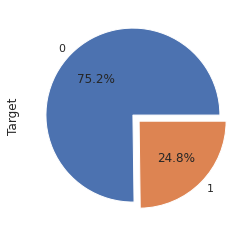

In [23]:
df.Target.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', explode=(0, 0.1))

## Features encoding and scaling

Separation of numerical and categorical features

In [24]:
FEATURES = list(filter(lambda x: x != 'Target', df.columns))
print(f"# features = {len(FEATURES)}")
print(*FEATURES, sep=" ")

# features = 13
Age Workclass Fnlwgt Education-num Marital-status Occupation Relationship Race Sex Capital-gain Capital-loss Hours-per-week Native-country


In [25]:
NUMERICAL_FEATURES = ['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
CATEGORICAL_FEATURES = ['Workclass', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

print(f"# numerical features = {len(NUMERICAL_FEATURES)}")
print(*NUMERICAL_FEATURES, sep=" ")

print(f"# categorical features = {len(CATEGORICAL_FEATURES)}")
print(*CATEGORICAL_FEATURES, sep=" ")

# numerical features = 6
Age Fnlwgt Education-num Capital-gain Capital-loss Hours-per-week
# categorical features = 7
Workclass Marital-status Occupation Relationship Race Sex Native-country


Standard-scaling of the numerical features

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [27]:
df[NUMERICAL_FEATURES] = scaler.fit_transform(df[NUMERICAL_FEATURES])
df[NUMERICAL_FEATURES].head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
0,-1.025432,0.350855,-1.222207,-0.14678,-0.218851,-0.078393
1,-0.041750,-0.945895,-0.438517,-0.14678,-0.218851,0.754502
2,-0.798428,1.393543,0.737018,-0.14678,-0.218851,-0.078393
3,0.412257,-0.278446,-0.046672,0.87711,-0.218851,-0.078393
5,-0.344421,0.084771,-1.614052,-0.14678,-0.218851,-0.911288


Target-encoding the categorical features

In [28]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(verbose=1, return_df=True, cols=CATEGORICAL_FEATURES)

In [29]:
df[FEATURES] = target_encoder.fit_transform(df.iloc[:,:-1], df.Target)

## Features correlation check

<AxesSubplot:>

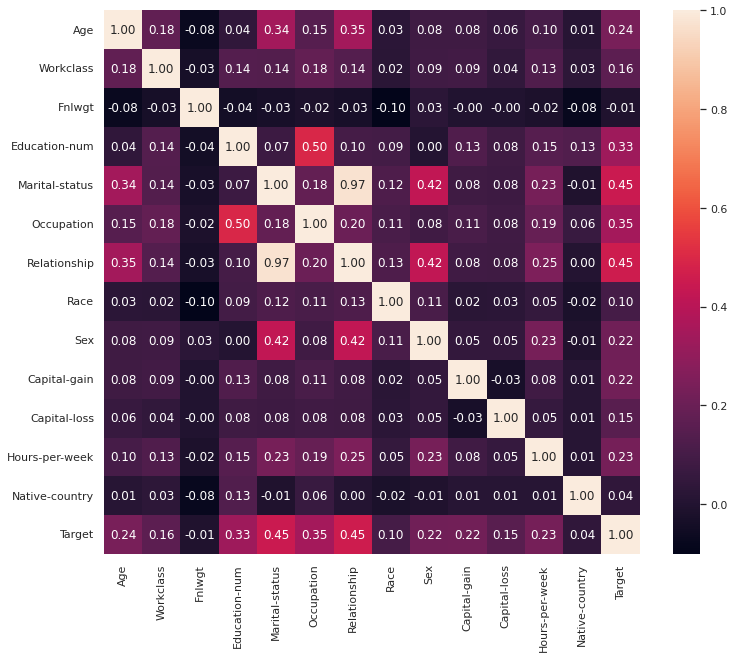

In [30]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, fmt=".2f")

We can see that the `Relationship` and `Marital-status` features are strongly correlated ($0.97$).
Since the meaning of the two columns is similar, I drop the `Relationship` column.

In [31]:
df.drop(labels=['Relationship'], axis=1, inplace=True)
CATEGORICAL_FEATURES = ['Workclass', 'Marital-status', 'Occupation', 'Race', 'Sex', 'Native-country']


<AxesSubplot:>

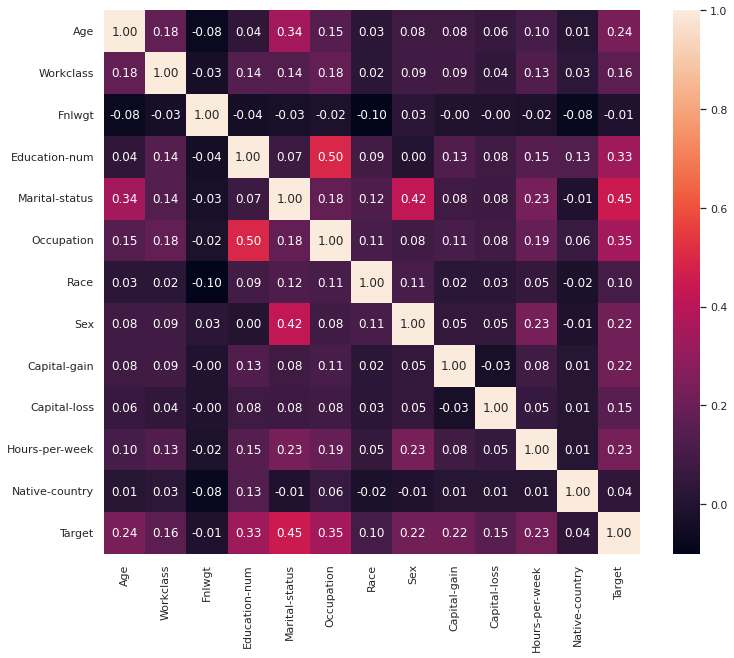

In [32]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, fmt=".2f")

# Train, Test, Validation splitting

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_test, validation = train_test_split(df, train_size=0.8, stratify=df['Target'], random_state=123)
train, test = train_test_split(train_test, train_size=0.7, stratify=train_test['Target'], random_state=123)

In [35]:
for x in "train,test,validation".split(","):
    print(f"{x}:")
    d = eval(x)
    print(f"size: {len(d)}")
    print(f"target distr:")
    print(d.Target.value_counts(normalize=True), end='\n\n')

train:
size: 25308
target distr:
0    0.752055
1    0.247945
Name: Target, dtype: float64

test:
size: 10847
target distr:
0    0.752005
1    0.247995
Name: Target, dtype: float64

validation:
size: 9039
target distr:
0    0.752074
1    0.247926
Name: Target, dtype: float64



In [36]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)
validation.to_csv("validation.csv", index=False)

### Creating the noisy-validation set

Creating the noisy validation set with $10$% of noise.

In [37]:
import sys
sys.path.append("../../")

from utils.insert_noise import insert_noise_numerical, insert_noise_categorical # type: ignore

In [38]:
NUMERICAL_NOISE_PERC = 0.1
CATEGORICAL_NOISE_PERC = 0.1

In [39]:
validation_noisy = validation.reset_index().copy()
validation_noisy[NUMERICAL_FEATURES] = insert_noise_numerical(validation_noisy[NUMERICAL_FEATURES].copy(), perc=NUMERICAL_NOISE_PERC)
validation_noisy[CATEGORICAL_FEATURES] = insert_noise_categorical(validation_noisy[CATEGORICAL_FEATURES].copy(), perc=CATEGORICAL_NOISE_PERC)
validation_noisy.drop(labels=['index'], axis=1, inplace=True)

In [40]:
validation_noisy.to_csv("validation-noisy.csv", index=False)

# MIA attack dataset creation

In this section I cluster the `test set` and for each cluster I extract `n` elements for each cluster-quantile.

Loading the test set:

In [41]:
test = pd.read_csv("./test.csv")

In [42]:
from utils.clustering import run_kmeans, plot_silouette, print_metrics
from utils.models import save_pickle_bz2
from sklearn.metrics import silhouette_score

In [43]:
cluster_set = test[NUMERICAL_FEATURES].to_numpy()
CLUSTERS = [*range(2,12)]

In [44]:
wcss, models = run_kmeans(cluster_set)

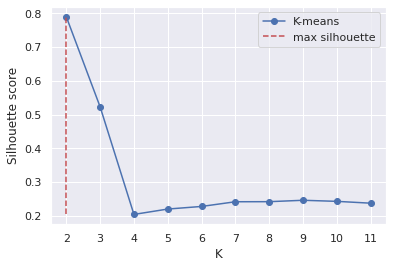

In [45]:
sil_score = []
for m in models:
    sil_score.append(silhouette_score(cluster_set, m.labels_))
    
plt.plot(CLUSTERS, sil_score, 'bo-', label="K-means")
plt.vlines(np.argmax(sil_score) + 2, min(sil_score), max(sil_score), 'r', '--', label="max silhouette")
plt.xticks(CLUSTERS)
plt.xlabel("K")
plt.xticks(range(2, 12))
plt.ylabel("Silhouette score")
plt.legend()
plt.show()

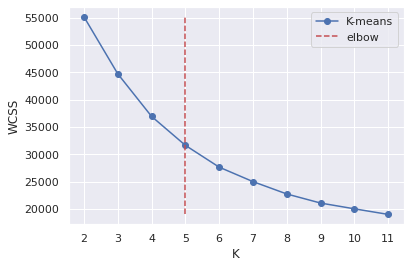

In [46]:
from kneed import KneeLocator

kl = KneeLocator(CLUSTERS, wcss, curve="convex", direction="decreasing")
plt.plot(CLUSTERS, wcss, 'o-', label="K-means")
plt.vlines(kl.elbow, min(wcss), max(wcss), 'r', '--', label="elbow")
plt.xticks(CLUSTERS)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.legend()
plt.show()

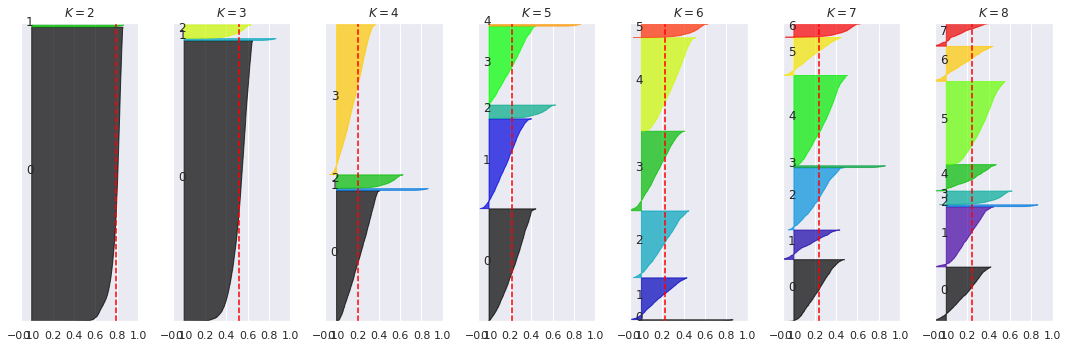

In [47]:
plot_silouette(cluster_set, models[0:7])

Picking K=$5$

In [48]:
kmeans = models[3]
test['Cluster'] = kmeans.predict(cluster_set)
test.Cluster.value_counts()
save_pickle_bz2("kmeans_adult_k5.bz2", kmeans)


In [49]:
import scipy.spatial.distance as distance

centroids = kmeans.cluster_centers_

def sample_from_quantile(data, centroid, nsamples=1, num_feat=NUMERICAL_FEATURES):
    distances = distance.cdist(data[NUMERICAL_FEATURES].to_numpy(), centroid, metric="euclidean")
    df = data.copy()
    df['Distances'] = distances
    labels = ['q1', 'q2', 'q3', 'q4']
    df['Quantiles'] = pd.qcut(df.Distances, q = 4, labels=labels)
    out = pd.concat([df[df['Quantiles'].eq(label)].sample(nsamples) for label in labels])
    return out.drop(labels=['Distances', 'Quantiles'], axis=1)

# 2 samples per quantile
samples_2 = []
for label, centroid in enumerate(centroids):
    data = test[test.Cluster == label]
    samples_2.append(sample_from_quantile(data, np.array([centroid]), nsamples=2))
samples_2 = pd.concat(samples_2)

# 3 samples per quantile
samples_3 = []
for label, centroid in enumerate(centroids):
    data = test[test.Cluster == label]
    samples_3.append(sample_from_quantile(data, np.array([centroid]), nsamples=3))
samples_3 = pd.concat(samples_3)

# Packing everything in a numpy dictionary

Packing all the datasets created and additional inormation in a numpy dictionary to be used for the black-box creation and additional experiments.

loading train, test, validation and noisy-validation

In [50]:
CATEGORICAL_FEATURES_MASK = [False, True, False, False, True, True, True, True, False, False, False, True]

In [51]:
def split_X_y(dataset):
    X = dataset.drop('Target', axis=1).to_numpy()
    y = dataset.Target.to_numpy()
    return X, y

In [52]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
validation = pd.read_csv("validation.csv")
validation_noisy = pd.read_csv("validation-noisy.csv")
categorical_features = CATEGORICAL_FEATURES
numerical_features = NUMERICAL_FEATURES
categorical_features_mask = CATEGORICAL_FEATURES_MASK
centroids = centroids


In [53]:
X_train, y_train = split_X_y(train)
X_test, y_test = split_X_y(test)
X_validation, y_validation = split_X_y(validation)
X_validation_noisy, y_validation_noisy = split_X_y(validation_noisy)
X_attack_2_per_quantile, y_attack_2_per_quantile = split_X_y(samples_2.drop('Cluster', axis=1))
X_attack_3_per_quantile, y_attack_3_per_quantile = split_X_y(samples_3.drop('Cluster', axis=1))

In [54]:
np.savez_compressed("adult-blackbox-data.npz",
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, X_validation=X_validation, y_validation=y_validation, \
    X_validation_noisy=X_validation_noisy, y_validation_noisy=y_validation_noisy, \
    X_attack_2_per_quantile=X_attack_2_per_quantile, y_attack_2_per_quantile=y_attack_2_per_quantile, \
    X_attack_3_per_quantile=X_attack_3_per_quantile, y_attack_3_per_quantile=y_attack_3_per_quantile, \
    categorical_features=categorical_features, numerical_features=numerical_features, \
    categorical_features_mask=categorical_features_mask, centroids=centroids
)